In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [40]:
file_path = r"C:\Python\HessiSolarFlare2018.csv"  #2002to2018.csv
df = pd.read_csv(file_path)
formatT = '%Y-%m-%d %H:%M:%S'
df['Datetime'] = pd.to_datetime(df['start.date'] + ' ' + df['start.time'], format=formatT)
df = df.set_index(pd.DatetimeIndex(df['Datetime']))
df = df.drop(columns=['start.date', 'start.time', 'Datetime'])
#df.head()
#organizo en otros dataframes las columnas de duracion.s y energia.kev en orden descendente
Emin = []
Emax = []
Eprom = []
for i in df['energy.kev']:
    result = re.findall(r'[\d\.\d]+', i)
    Emax.append(float(result[1]))
    Emin.append(float(result[0]))
    Eprom.append((float(result[0]) + float(result[1]))/2)
df['EnergiaMin']=Emin
df['EnergiaMax']=Emax
df['EnergiaProm']=Eprom
#saca las flags en distintos dataframes
df1=pd.DataFrame(df.value_counts('flag.1'),columns=['Bandera1']).reset_index()
df2=pd.DataFrame(df.value_counts('flag.2'),columns=['Bandera2']).reset_index()
df3=pd.DataFrame(df.value_counts('flag.3'),columns=['Bandera3']).reset_index()
df4=pd.DataFrame(df.value_counts('flag.4'),columns=['Bandera4']).reset_index()
df5=pd.DataFrame(df.value_counts('flag.5'),columns=['Bandera5']).reset_index()
#print(df5)
#Filtros
Q13=df['flag.3']=="Q1"
Q14=df['flag.4']=="Q1"
Q15=df['flag.5']=="Q1"
dfQ13=df[Q13]
dfQ1=pd.concat([df[Q13],df[Q14],df[Q15]]).sort_values('Datetime')
#print(dfQ1['flag.5'])
dfQ1.value_counts('flag.5')
#print(dfQ1.head(20))
#print(dfA1.head(10))
#Mirando los datos y de que tipo son

flag.5
Q1    1265
SE      26
dtype: int64

<AxesSubplot:xlabel='duration.s', ylabel='peak.c/s'>

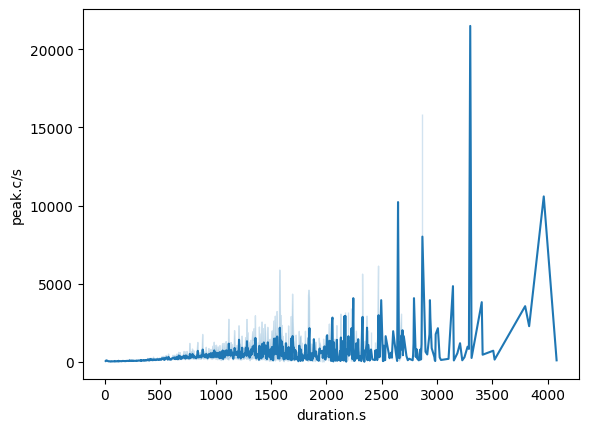

In [41]:
#graficas y analisis de datos
#imprimo la grafica
sns.lineplot(data=dfQ1,x='duration.s',y='peak.c/s')
#sns.displot(data=df, x='')